# Linear regression

## Generate data

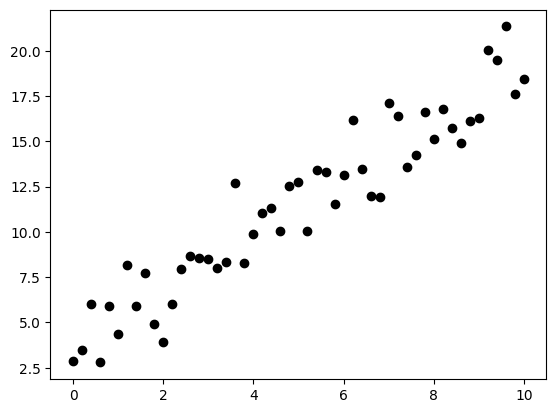

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Linear function
def f(x,m,b):
    return m * x + b

# Parameter settings and data generation
m = 3/2
b = 4.2656
N = 51
x = np.linspace(0, 10, N)
y = f(x, m, b) + np.random.randn(N) * random.uniform(1.0, 2.5)


# Plot
plt.scatter(x,y,c='black')

## Maximum likelihood

Text(0.5, 1.0, 'w:   b = 3.79672, m = 1.53676')

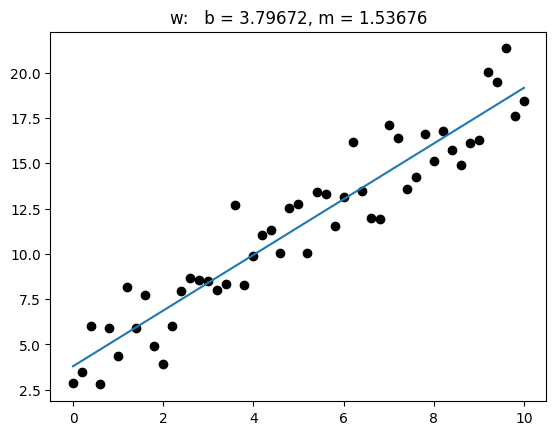

In [5]:
# w calculation prep
Φ = np.vstack([np.ones(N), x]).T

# Calculate w 
w = np.linalg.solve(Φ.T @ Φ, Φ.T @ y)

# y
y_linreg = Φ @ w

# Plot
plt.scatter(x,y,c='black')
plt.plot(x, y_linreg)
plt.title('w:   b = ' + str(np.round(w[0], 5)) + ', m = ' + str(np.round(w[1], 5)))

## Maximum a posteriori

[[ 3.32630753  0.        ]
 [ 3.32630753  0.32095188]
 [ 3.32630753  0.64190377]
 [ 3.32630753  0.96285565]
 [ 3.32630753  1.28380754]
 [ 3.32630753  1.60475942]
 [ 3.32630753  1.9257113 ]
 [ 3.32630753  2.24666319]
 [ 3.32630753  2.56761507]
 [ 3.32630753  2.88856696]
 [ 3.32630753  3.20951884]
 [ 3.32630753  3.53047072]
 [ 3.32630753  3.85142261]
 [ 3.32630753  4.17237449]
 [ 3.32630753  4.49332638]
 [ 3.32630753  4.81427826]
 [ 3.32630753  5.13523014]
 [ 3.32630753  5.45618203]
 [ 3.32630753  5.77713391]
 [ 3.32630753  6.0980858 ]
 [ 3.32630753  6.41903768]
 [ 3.32630753  6.73998956]
 [ 3.32630753  7.06094145]
 [ 3.32630753  7.38189333]
 [ 3.32630753  7.70284521]
 [ 3.32630753  8.0237971 ]
 [ 3.32630753  8.34474898]
 [ 3.32630753  8.66570087]
 [ 3.32630753  8.98665275]
 [ 3.32630753  9.30760463]
 [ 3.32630753  9.62855652]
 [ 3.32630753  9.9495084 ]
 [ 3.32630753 10.27046029]
 [ 3.32630753 10.59141217]
 [ 3.32630753 10.91236405]
 [ 3.32630753 11.23331594]
 [ 3.32630753 11.55426782]
 

Text(0.5, 1.0, 'w:   b = 3.32631, m = 1.60476')

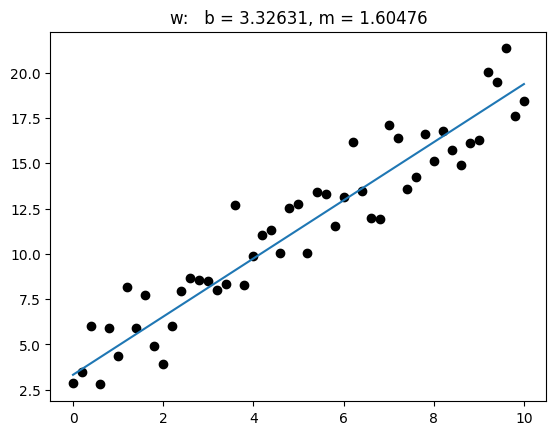

In [30]:
# w calculation prep
Φ = np.vstack([np.ones(N), x]).T
α = 3
ß = 5

# Calculate w 
w = np.linalg.solve(Φ.T @ Φ + λ * np.identity(2), Φ.T @ y)

# w posterior
w_post = ß/2 * (np.vstack([np.ones(len(y)), y]).T - Φ*w) ** 2 + α/2 * w.T * w

# y
y_linreg = Φ @ w

# Plot
plt.scatter(x,y,c='black')
plt.plot(x, y_linreg)
plt.title('w:   b = ' + str(np.round(w[0], 5)) + ', m = ' + str(np.round(w[1], 5)))